# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)   
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.01, 0.001, 1e-4]
EPOCHS = 50
BATCH_SIZE = 128
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [7]:
import itertools
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________

50000/50000 [==============================] - 2s 48us/step - loss: 1.0388 - acc: 0.6370 - val_loss: 1.3238 - val_acc: 0.5450
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.0312 - acc: 0.6369 - val_loss: 1.3464 - val_acc: 0.5274
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.0221 - acc: 0.6408 - val_loss: 1.4026 - val_acc: 0.5160
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________________

50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 3s 50us/step - loss: 1.5579 - acc: 0.4561 - val_loss: 1.5792 - val_acc: 0.4457
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5544 - acc: 0.4576 - val_loss: 1.5707 - val_acc: 0.4512
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________________

50000/50000 [==============================] - 3s 55us/step - loss: 0.9651 - acc: 0.6574 - val_loss: 1.8648 - val_acc: 0.4794
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8985 - acc: 0.3170 - val_loss: 1.7631 - val_acc: 0.3653
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6940 - acc: 0.3889 - val_loss: 1.6443 - val_acc: 0.4038
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6059 - acc: 0.4242 - val_loss: 1.5814 - val_acc: 0.4371
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5334 - acc: 0.4519 - val_loss: 1.5117 - val_acc: 0.4695
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4895 - acc: 0.4666 - val_loss: 1.5071 - val_acc: 0.4653
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4616 - acc: 0.4761 - val_loss: 1.4666 - val_acc: 0.4753
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4251 - acc: 0.4898 - val_loss: 1.4467 - val_acc

Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2918 - acc: 0.1247 - val_loss: 2.2783 - val_acc: 0.1416
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2666 - acc: 0.1485 - val_loss: 2.2586 - val_acc: 0.1567
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2489 - acc: 0.1633 - val_loss: 2.2423 - val_acc: 0.1717
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2336 - acc: 0.1785 - val_loss: 2.2276 - val_acc: 0.1856
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.2195 - acc: 0.1887 - val_loss: 2.2140 - val_acc: 0.1997
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.2065 - acc: 0.1989 - val_loss: 2.2015 - val_acc: 0.2091
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.1945 - acc: 0.2064 - val_loss: 2.1896 - val_acc: 0.2165
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 54us/step - loss: 1.6481 - acc: 0.4148 - val_loss: 1.6131 - val_acc: 0.4200
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5918 - acc: 0.4367 - val_loss: 1.5441 - val_acc: 0.4524
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5464 - acc: 0.4526 - val_loss: 1.5959 - val_acc: 0.4263
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5088 - acc: 0.4661 - val_loss: 1.5820 - val_acc: 0.4330
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4717 - acc: 0.4801 - val_loss: 1.4928 - val_acc: 0.4786
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4416 - acc: 0.4914 - val_loss: 1.4626 - val_acc: 0.4824
Epoch 9/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4154 - acc: 0.5000 - val_loss: 1.4826 - val_acc: 0.4691
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 52us/step - loss: 1.8513 - acc: 0.3569 - val_loss: 1.8431 - val_acc: 0.3533
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8323 - acc: 0.3628 - val_loss: 1.8269 - val_acc: 0.3671
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8174 - acc: 0.3698 - val_loss: 1.8135 - val_acc: 0.3682
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8048 - acc: 0.3733 - val_loss: 1.8026 - val_acc: 0.3729
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7943 - acc: 0.3767 - val_loss: 1.7929 - val_acc: 0.3774
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7852 - acc: 0.3809 - val_loss: 1.7851 - val_acc: 0.3776
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7771 - acc: 0.3826 - val_loss: 1.7782 - val_acc: 0.3814
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 54us/step - loss: 1.5009 - acc: 0.4686 - val_loss: 1.4965 - val_acc: 0.4677
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4604 - acc: 0.4834 - val_loss: 1.4751 - val_acc: 0.4751
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4289 - acc: 0.4936 - val_loss: 1.4700 - val_acc: 0.4842
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3937 - acc: 0.5089 - val_loss: 1.4328 - val_acc: 0.4865
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3726 - acc: 0.5162 - val_loss: 1.4218 - val_acc: 0.4977
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3421 - acc: 0.5262 - val_loss: 1.4153 - val_acc: 0.4945
Epoch 11/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3147 - acc: 0.5375 - val_loss: 1.3940 - val_acc: 0.5104
Epoch 12/50
50000/50000 [=========================

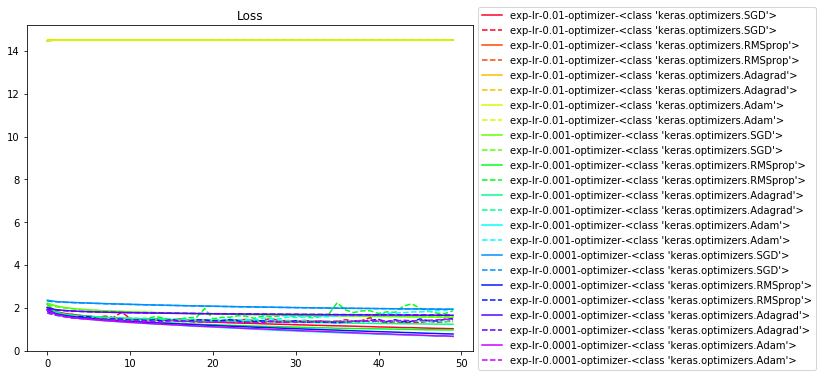

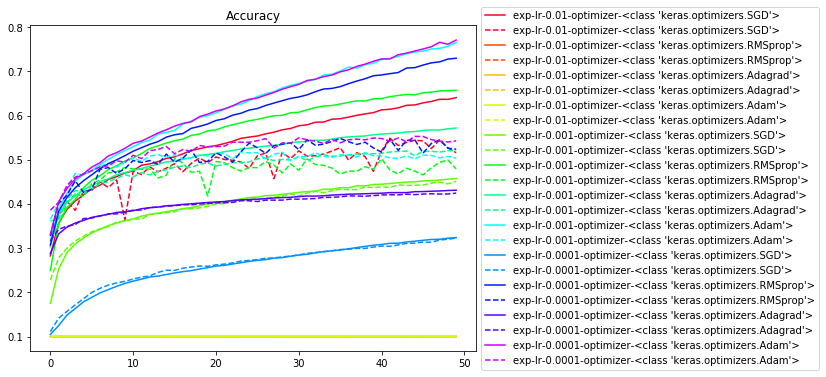

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()